**Import required modules**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pydot
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [2]:
df = pd.read_csv("data_sample.csv")
varnames = ["Cash", "Inventories", "Current Assets", "Tangible Assets", "Intangible Assets", "Total Assets",
            "Accounts Receivable", "Lands and Buildings", "Equity", "Accrual for Pension Liabilities",
            "Total Current Liabilities", "Total Longterm Liabilities", "Bank Debt", "Accounts Payable",
            "Sales", "Amortization Depreciation", "Interest Expenses", "EBIT", "Operating Income",
            "Net Income", "Increase Inventories", "Increase Liabilities", "Increase Cash", "Number Employees",
            "Solvent = 0, Insolvent = 1"]
df.columns = varnames

X = df.drop('Solvent = 0, Insolvent = 1', axis=1)
y = df['Solvent = 0, Insolvent = 1']

In [3]:
df.head()

,Cash,Inventories,Current Assets,Tangible Assets,Intangible Assets,Total Assets,Accounts Receivable,Lands and Buildings,Equity,Accrual for Pension Liabilities,...,Amortization Depreciation,Interest Expenses,EBIT,Operating Income,Net Income,Increase Inventories,Increase Liabilities,Increase Cash,Number Employees,"Solvent = 0, Insolvent = 1"
0,811.0,5367.0,13572.0,3554.0,0.0,41475.0,6023.0,1118.0,0.0,90.0,...,445.0,-158.0,605.0,605.0,366.0,-439.0,14631.0,2720.0,489.0,1
1,-572.0,454.0,1774.0,4420.0,70.0,6287.0,460.0,3629.0,924.0,0.0,...,241.0,-137.0,-668.0,-668.0,-813.0,-1013.0,-174.0,-1028.0,76.0,1
2,115.0,4088.0,6739.0,1475.0,18.0,8280.0,2545.0,1377.0,1009.0,0.0,...,129.0,-235.0,136.0,136.0,-14.0,3253.0,1716.0,-43.0,58.0,1
3,3179.0,9930.0,86256.0,2419.0,186.0,89197.0,74108.0,2327.0,16961.0,0.0,...,582.0,-4255.0,7999.0,7999.0,2597.0,609.0,13743.0,1338.0,53.0,1
4,-108.0,6342.0,14510.0,1030.0,877.0,16827.0,6382.0,1.0,3416.0,474.0,...,514.0,-300.0,-79.0,-79.0,-622.0,70.0,532.0,-553.0,198.0,1


**Generate tree with desired depth**

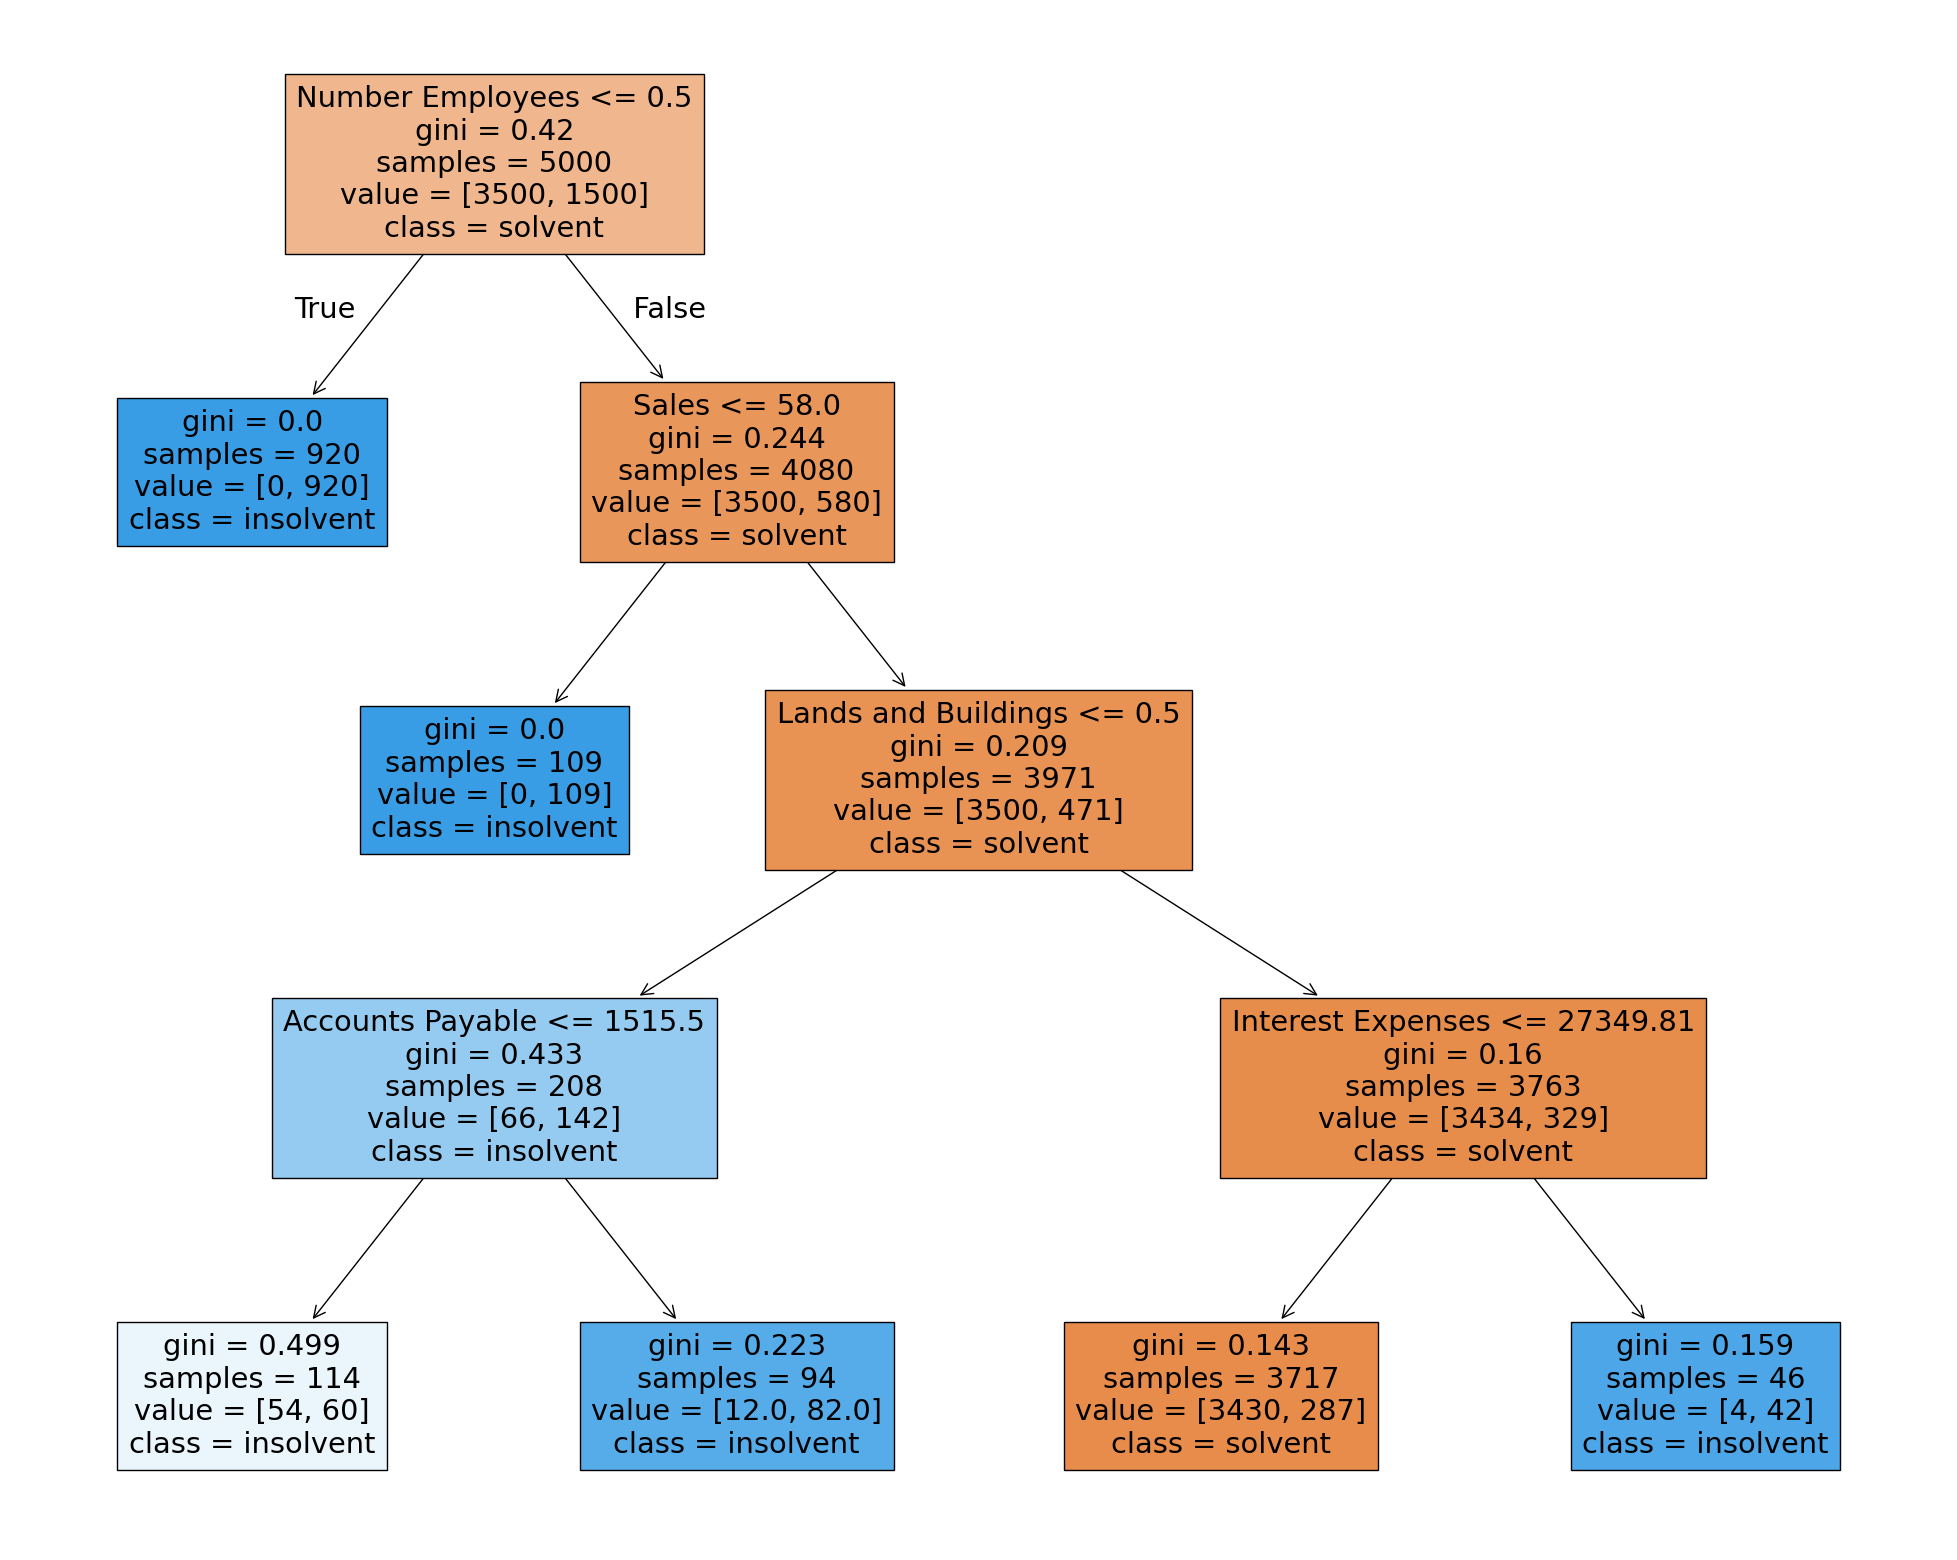

In [4]:
clf = DecisionTreeClassifier(random_state=0, max_depth=4) # change depth to change number of nodes
clf.fit(X, y)

# Create figure with transparent background
fig = plt.figure(figsize=(25, 20), facecolor='none')  # Transparent figure background
ax = fig.add_subplot(111, facecolor='none')  # Transparent axes background

# Plot the tree with transparent background
_ = tree.plot_tree(clf, 
                   feature_names=df.columns,  
                   class_names=["solvent", "insolvent"],
                   filled=True,
                   ax=ax)  # Use the transparent axes

# Remove axes borders and ticks for cleaner transparent look
ax.axis('off')

# Save with transparent background
fig.savefig("Decision Tree Creditreform.png", 
            transparent=True, 
            bbox_inches='tight',  # Remove extra white space
            pad_inches=0)         # Remove padding

#plt.close(fig)

**Generate a movie of the growing tree** - you will need to install ffmpeg

In [5]:
import subprocess

input_pattern = "output/output.%03d.png"
output_file = "credit_tree.mov"

cmd = [
    "ffmpeg",
    "-framerate", "0.5", 
    "-i", input_pattern,
    "-c:v", "prores_ks",   # ProRes codec with alpha
    "-pix_fmt", "yuva444p10le",  # ProRes with alpha
    "-r", "25",
    output_file
]

subprocess.run(cmd, check=True)
print(f"Video saved to {output_file}")


ffmpeg version 7.1.1 Copyright (c) 2000-2025 the FFmpeg developers
  built with Apple clang version 17.0.0 (clang-1700.0.13.3)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex

KeyboardInterrupt: 

In [6]:
print(df.columns)

Index(['Cash', 'Inventories', 'Current Assets', 'Tangible Assets',
       'Intangible Assets', 'Total Assets', 'Accounts Receivable',
       'Lands and Buildings', 'Equity', 'Accrual for Pension Liabilities',
       'Total Current Liabilities', 'Total Longterm Liabilities', 'Bank Debt',
       'Accounts Payable', 'Sales', 'Amortization Depreciation',
       'Interest Expenses', 'EBIT', 'Operating Income', 'Net Income',
       'Increase Inventories', 'Increase Liabilities', 'Increase Cash',
       'Number Employees', 'Solvent = 0, Insolvent = 1'],
      dtype='object')


**Train-test split & Grid Search** 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.33, # ratio of data that is used for testing
    random_state=42,
    stratify = y # Keeps the ratio of the labels in train and test the same as in the initial data
)

In [8]:
import math
n_feature = len(df.columns)
rf = RandomForestClassifier(
    max_features=math.ceil(n_feature**0.5), # Number of randomly picked features for split 
    random_state=42, # Seed for random number generator
    oob_score=True, # Out of Bag accuracy score
    bootstrap=True # 
)
param_grid = {
    'max_depth': np.arange(3,7, 1),
    'n_estimators': [50, 100, 150, 200, 250],
    'max_features': np.arange(3,n_feature,3)
}
grid_search = GridSearchCV(
    estimator=rf, # RandomForestClassifier to be optimized
    param_grid=param_grid, # parameter grid
    cv=4, # cross validation split
    n_jobs=-1, # setting for parallization, -1: use all processors
    verbose=1,
    refit=True # Refit estimator using best found parameters
)
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 160 candidates, totalling 640 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': array([3, 4, 5, 6]), 'max_features': array([ 3, 6..., 18, 21, 24]), 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [9]:
print(grid_search.best_params_)


{'max_depth': np.int64(6), 'max_features': np.int64(15), 'n_estimators': 200}


In [10]:
rf_ = grid_search.best_estimator_
print('The train accuracy: %.4f'%rf_.score(X_train,y_train))
print('The test accuracy: %.4f'%rf_.score(X_test,y_test))
pd.DataFrame(confusion_matrix(y_test, rf_.predict(X_test)), 
             index=["solvent", "not solvent"], columns=["solvent", "not solvent"])

The train accuracy: 0.9439
The test accuracy: 0.9358


,solvent,not solvent
solvent,1143,12
not solvent,94,401


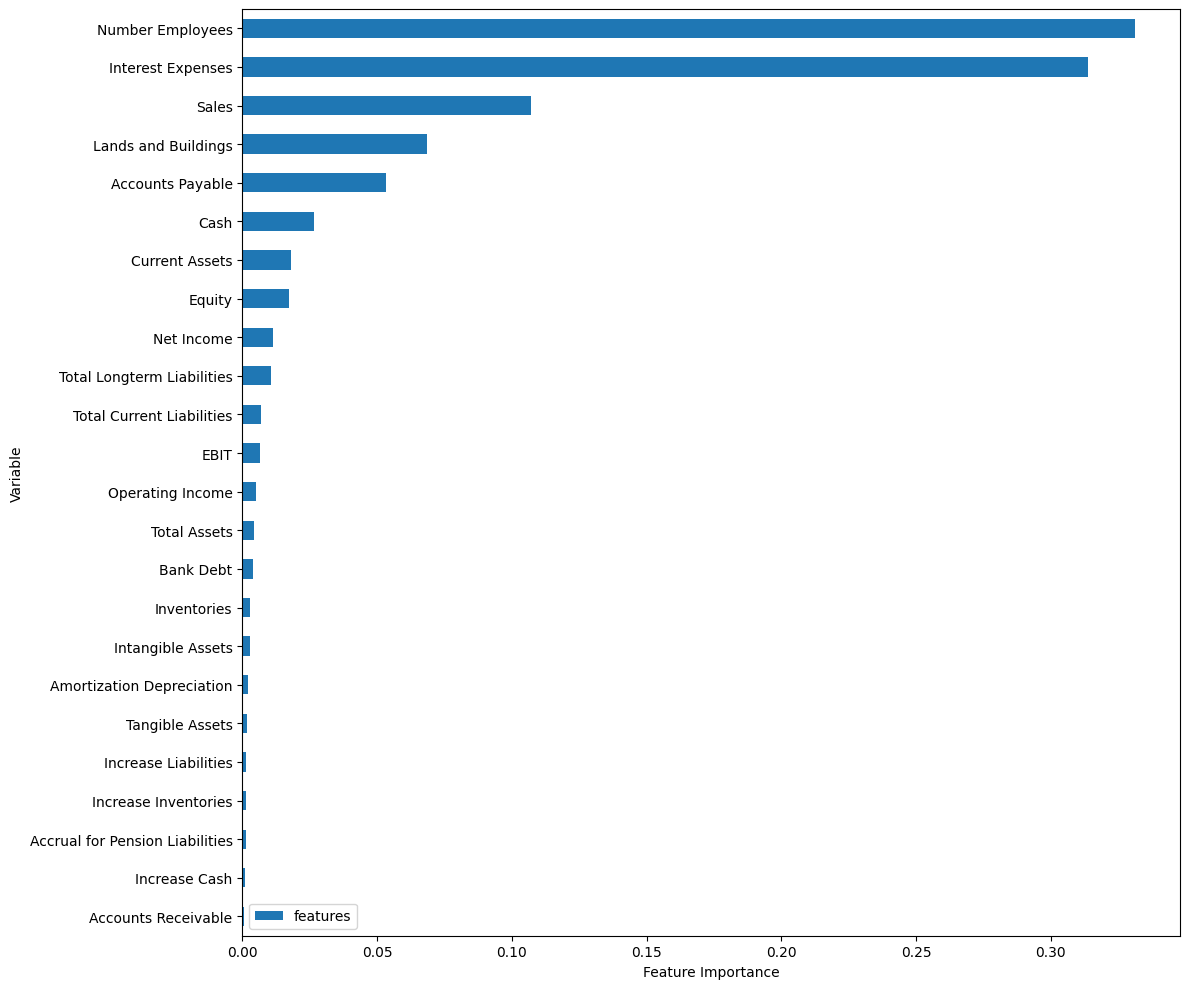

In [11]:
feature_imp = pd.DataFrame(rf_.feature_importances_,index=df.columns[:-1],columns=['features']).sort_values('features')

# Create figure with transparent facecolor
fig, ax = plt.subplots(figsize=(12, 10))
ax.patch.set_alpha(0.0)  # Transparent axes background
fig.patch.set_alpha(0.0)  # Transparent figure background

feature_imp.plot(kind='barh', ax=ax, zorder=2)

# Keep spines (axes lines) visible but make background transparent
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Ensure ticks and labels remain visible
ax.tick_params(colors='black', which='both')

plt.xlabel('Feature Importance', color='black')
plt.ylabel('Variable', color='black')
plt.tight_layout()
plt.savefig('RF_feature_importance.png', dpi=600, transparent=True, 
            facecolor='none', edgecolor='none')

**Plot ROC Curves for Random Forest**

In [12]:
y_score = rf_.fit(X_train, y_train).predict_proba(X_test)

In [13]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_score[:,1])
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

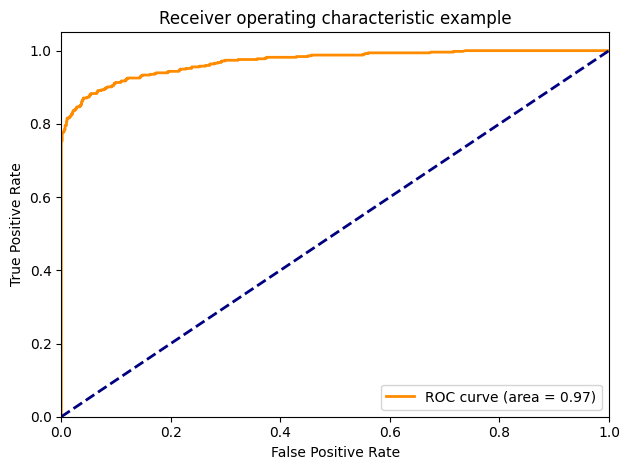

In [14]:
# Create figure with transparent background
fig, ax = plt.subplots()
fig.patch.set_alpha(0.0)  # Transparent figure background
ax.patch.set_alpha(0.0)  # Transparent axes background

lw = 2
ax.plot(
    fpr[1],
    tpr[1],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[1],
)
ax.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel("False Positive Rate", color='black')
ax.set_ylabel("True Positive Rate", color='black')
ax.set_title("Receiver operating characteristic example", color='black')
ax.legend(loc="lower right")

# Keep spines (axes lines) visible
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Ensure ticks and labels remain visible
ax.tick_params(colors='black', which='both')

plt.tight_layout()
plt.savefig('ROC_curve.png', dpi=600, transparent=True, 
            facecolor='none', edgecolor='none')
plt.show()

In [15]:
y_score_clf = clf.fit(X_train, y_train).predict_proba(X_test)

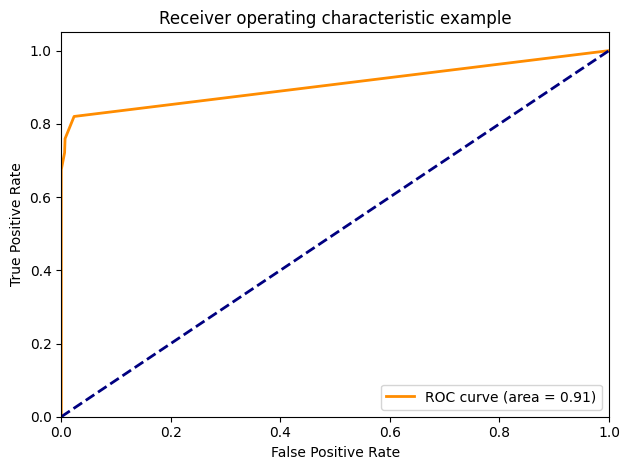

In [16]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:], y_score_clf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_score_clf[:, 1])
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Create figure with transparent background
fig, ax = plt.subplots()
fig.patch.set_alpha(0.0)  # Transparent figure background
ax.patch.set_alpha(0.0)  # Transparent axes background

lw = 2
ax.plot(
    fpr[1],
    tpr[1],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[1],
)
ax.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel("False Positive Rate", color='black')
ax.set_ylabel("True Positive Rate", color='black')
ax.set_title("Receiver operating characteristic example", color='black')
ax.legend(loc="lower right")

# Keep spines (axes lines) visible
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Ensure ticks and labels remain visible
ax.tick_params(colors='black', which='both')

plt.tight_layout()
plt.savefig('ROC_curve.png', dpi=600, transparent=True, 
            facecolor='none', edgecolor='none')
plt.show()